# **Cryptocurrencies Holders**

## **Introduction**

This notebook aims to analyze **holders of various cryptocurrencies**. Indeed, we found that this factor was often a drawback of cryptocurrencies which diplay the **majority of tokens within few holders**. Nowadays, holdings distribution has become a major indicator of a token **decentralization** which is influencing investors behavior.

**Useful Links**

To perform this analysis, we used various online resources:

https://medium.com/crypto-code/learn-the-basics-of-web-scraping-data-with-python-and-beautifulsoup-2222e6dbe117

https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

https://stackoverflow.com/questions/49192522/web-scraping-coinmarketcap-com-with-python-requests-beautifulsoup

https://towardsdatascience.com/scraping-table-data-from-websites-using-a-single-line-in-python-ba898d54e2bc

https://www.pluralsight.com/guides/web-scraping-with-beautiful-soup

https://tommycc.medium.com/web-scraping-crypto-prices-with-python-41072ea5b5bf

https://stackoverflow.com/questions/64761914/scraping-historical-data-from-coinmarketcap

https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop

https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

https://stackoverflow.com/questions/1117916/merge-keys-array-and-values-array-into-an-object-in-javascript

https://stackoverflow.com/questions/57631895/dictionary-to-dataframe-error-if-using-all-scalar-values-you-must-pass-an-ind

https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

https://www.quora.com/How-do-I-merge-multiple-dictionaries-values-having-the-same-key-in-Python

https://stackoverflow.com/questions/5946236/how-to-merge-multiple-dicts-with-same-key-or-different-key

https://stackoverflow.com/questions/55540614/append-only-matching-columns-to-dataframe


https://www.kaggle.com/naren3256/kmeans-clustering-and-cluster-visualization-in-3d

https://plotly.com/python/

https://towardsdatascience.com/4-ways-to-improve-your-plotly-graphs-517c75947f7e

https://blog.spiking.com/whales-in-cryptocurrencies-5b7d2dbd05c5



In [1]:
# Import necessary libraries
import lxml.html as lh
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import time
import traceback

## **Data Collection and Processing**

To collect the data, we are **scraping CoinMarketCap website** using Request and BeautifulSoup libraries. First, we are looking at **general cryptocurrencies indicators** to relate them with holders distribution. 

In [2]:
# Retrieve CMC data for page 1
result = requests.get(f'https://coinmarketcap.com/?page=1')
soup = BeautifulSoup(result.content, 'html.parser')
data = soup.find('script', id = '__NEXT_DATA__', type = "application/json")

# Using data.content[0] to remove script tags 
coin_data = json.loads(data.contents[0])
listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

# Initiate df
df = pd.DataFrame()

# Loop through the Cryptos
for i in range(1,len(listings)):

  # Get the dictionnary and dataframe of each listing 
  dict_i = dict(zip(listings[0]['keysArr'],listings[i]))
  df_i = pd.DataFrame(dict_i, index = [i])

  # Append all the records to our main df
  df = df.append(df_i)

# Display DataFrame
df

,ath,atl,circulatingSupply,cmcRank,dateAdded,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,lastUpdated,low24h,marketPairCount,maxSupply,name,quote.BTC.dominance,quote.BTC.fullyDilluttedMarketCap,quote.BTC.lastUpdated,quote.BTC.marketCap,quote.BTC.marketCapByTotalSupply,quote.BTC.name,quote.BTC.percentChange1h,quote.BTC.percentChange24h,quote.BTC.percentChange30d,quote.BTC.percentChange60d,quote.BTC.percentChange7d,quote.BTC.percentChange90d,quote.BTC.price,quote.BTC.selfReportedMarketCap,quote.BTC.turnover,quote.BTC.volume24h,quote.BTC.volume30d,quote.BTC.volume7d,quote.BTC.ytdPriceChangePercentage,quote.ETH.dominance,quote.ETH.fullyDilluttedMarketCap,quote.ETH.lastUpdated,quote.ETH.marketCap,quote.ETH.marketCapByTotalSupply,...,quotes.1.marketCapByTotalSupply,quotes.1.name,quotes.1.percentChange1h,quotes.1.percentChange24h,quotes.1.percentChange30d,quotes.1.percentChange60d,quotes.1.percentChange7d,quotes.1.percentChange90d,quotes.1.price,quotes.1.selfReportedMarketCap,quotes.1.turnover,quotes.1.volume24h,quotes.1.volume30d,quotes.1.volume7d,quotes.1.ytdPriceChangePercentage,quotes.2.dominance,quotes.2.fullyDilluttedMarketCap,quotes.2.lastUpdated,quotes.2.marketCap,quotes.2.marketCapByTotalSupply,quotes.2.name,quotes.2.percentChange1h,quotes.2.percentChange24h,quotes.2.percentChange30d,quotes.2.percentChange60d,quotes.2.percentChange7d,quotes.2.percentChange90d,quotes.2.price,quotes.2.selfReportedMarketCap,quotes.2.turnover,quotes.2.volume24h,quotes.2.volume30d,quotes.2.volume7d,quotes.2.ytdPriceChangePercentage,rank,selfReportedCirculatingSupply,slug,symbol,totalSupply,tvl
1,68789.625939,65.526001,1.896346e+07,1,2013-04-28T00:00:00.000Z,True,False,40288.18958,1,1,False,2022-02-20T09:03:00.000Z,38214.505943,9169,21000000,Bitcoin,41.9162,8.029665e+11,2022-02-20T09:04:00.000Z,1.895305e+07,1.895305e+07,BTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.024319,4.609269e+05,1.037967e+07,4.990121e+06,-19.8174,41.9162,8.029665e+11,2022-02-20T09:04:00.000Z,2.772846e+08,2.772846e+08,...,2.772846e+08,ETH,-0.139602,1.895375,-2.373983,-22.467060,0.833902,-33.469841,14.622045,0.000000,0.024319,6.743396e+06,1.518554e+08,7.300584e+07,-19.8174,41.9162,8.029665e+11,2022-02-20T09:03:00.000Z,7.250965e+11,7.250965e+11,USD,-1.514820,-4.535596,-2.373983,-22.467060,-9.911523,-33.469841,38236.502212,0.000000e+00,0.024319,1.763391e+10,3.971004e+11,1.909096e+11,-19.8174,1,0.000000e+00,bitcoin,BTC,1.896346e+07,NaN
2,4891.704698,0.420897,1.196556e+08,2,2015-08-07T00:00:00.000Z,True,False,2791.621518,1027,1,False,2022-02-20T09:03:00.000Z,2610.700753,5515,None,Ethereum,18.0609,3.126363e+11,2022-02-20T09:04:00.000Z,8.171895e+06,8.171895e+06,BTC,-0.095896,-1.911573,-9.635568,-35.310169,-1.021997,-37.937787,0.068295,0.00000,0.038072,3.111196e+05,9.314192e+06,2.262933e+06,-30.6894,18.0609,3.126363e+11,2022-02-20T09:04:00.000Z,1.195554e+08,1.195554e+08,...,1.195554e+08,ETH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.038072,4.551704e+06,1.362673e+08,3.310689e+07,-30.6894,18.0609,3.126363e+11,2022-02-20T09:03:00.000Z,3.126363e+11,3.126363e+11,USD,-1.511035,-6.310128,-9.635568,-35.310169,-10.755987,-37.937787,2612.800854,0.000000e+00,0.038072,1.190266e+10,3.563377e+11,8.657418e+10,-30.6894,2,0.000000e+00,ethereum,ETH,1.196556e+08,NaN
3,1.21549,0.568314,7.901950e+10,3,2015-02-25T00:00:00.000Z,None,False,1.00079,825,1,True,2022-02-20T09:03:00.000Z,1.00033,28243,None,Tether,4.5698,8.109811e+10,2022-02-20T09:04:00.000Z,2.066316e+06,2.119796e+06,BTC,1.439597,4.680555,0.012702,0.002563,10.903320,-0.044037,0.000026,0.00000,0.574750,1.187615e+06,3.382764e+07,7.575211e+06,-0.0088,4.5698,8.109811e+10,2022-02-20T09:04:00.000Z,3.023035e+07,3.101278e+07,...,3.101278e+07,ETH,1.399117,6.721986,0.012702,0.002563,11.923757,-0.044037,0.000383,0.000000,0.574750,1.737490e+07,4.949010e+08,1.108259e+08,-0.0088,4.5698,8.109811e+10,2022-02-20T09:03:00.000Z,7.905207e+10,8.109811e+10,USD,0.002708,-0.013609,0.012702,0.00

In [3]:
%%capture

# Get crypto listing 

# Initiate coins list
coins = []

for i in range(1,86):

  # Get CoinMarketCap data
  result = requests.get(f'https://coinmarketcap.com/?page={i}')
  soup = BeautifulSoup(result.content, 'html.parser')
  data = soup.find('script', id = '__NEXT_DATA__', type = "application/json")

  # Using data.content[0] to remove script tags 
  coin_data = json.loads(data.contents[0])
  listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

  # Loop through all cryptos names
  for i in range(1, len(listings)):
    coins.append(listings[i][-5])

coins

Now that we retrieved data for the **top 100**, let's apply the same process to **all the pages** available on CoinMarketCap: More than 8000 cryptocurrencies!

However, we can see with the precedent listing that the **name is different** between some cryptocurrencies. This is due to a **different number of keys** between pages. We'll have to pay attention to that when repeating the process for all data!

In [5]:
# Retrieve CoinMarketCap data for all pages

# Inititate df
df = pd.DataFrame()

for p in range(1,96):

  print(p)
  
  # Get CoinMarketCap data
  result = requests.get(f'https://coinmarketcap.com/?page={p}')
  soup = BeautifulSoup(result.content, 'html.parser')
  data = soup.find('script', id = '__NEXT_DATA__', type = "application/json")

  # Using data.content[0] to remove script tags 
  coin_data = json.loads(data.contents[0])
  listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

  # Loop through the cryptos
  for i in range(1,len(listings)):

    # Get the dictionnary and dataframe of each listing 
    dict_i = dict(zip(listings[0]['keysArr'],listings[i]))
    df_i = pd.DataFrame(dict_i, index = [0])

    # Use concat to append all the records to our main df
    # Some pages show different numbers of columns so we use outer join
    df = pd.concat([df,df_i],join='outer')

# # Select columns 
df.reset_index(inplace=True)
df = df.loc[:,['ath','atl','circulatingSupply','cmcRank','dateAdded','hasAdListingButton','hasFilters',
               'high24h','id','isActive','isAudited','lastUpdated','low24h','marketPairCount','maxSupply',
               'name','slug','symbol']]

# Display DataFrame
print(df.info())
df

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411 entries, 0 to 9410
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ath                 9271 non-null   object 
 1   atl                 9271 non-null   object 
 2   circulatingSupply   9411 non-null   float64
 3   cmcRank             9411 non-null   int64  
 4   dateAdded           9411 non-null   object 
 5   hasAdListingButton  8 non-null      object 
 6   hasFilters          9411 non-null   bool   
 7   high24h             9271 non-null   object 
 8   id                  9411 non-null   int64  
 9   isActive            9411 non-null   int64  
 10  isAudited           9411

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,ath,atl,circulatingSupply,cmcRank,dateAdded,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,lastUpdated,low24h,marketPairCount,maxSupply,name,slug,symbol
0,68789.625939,65.526001,1.896346e+07,1,2013-04-28T00:00:00.000Z,True,False,40288.18958,1,1,False,2022-02-20T09:09:00.000Z,38195.681035,9169,21000000,Bitcoin,bitcoin,BTC
1,4891.704698,0.420897,1.196556e+08,2,2015-08-07T00:00:00.000Z,True,False,2789.69165,1027,1,False,2022-02-20T09:09:00.000Z,2610.700753,5515,None,Ethereum,ethereum,ETH
2,1.21549,0.568314,7.901950e+10,3,2015-02-25T00:00:00.000Z,None,False,1.00079,825,1,True,2022-02-20T09:09:00.000Z,1.00033,28243,None,Tether,tether,USDT
3,690.931965,0.096109,1.651168e+08,4,2017-07-25T00:00:00.000Z,True,False,403.781286,1839,1,True,2022-02-20T09:09:00.000Z,376.242825,704,165116760,BNB,bnb,BNB
4,2.349556,0.929222,5.259136e+10,5,2018-10-08T00:00:00.000Z,None,False,1.000663,3408,1,False,2022-02-20T09:09:00.000Z,0.998878,3069,None,USD Coin,usd-coin,USDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9406,0.000002,0.0,0.000000e+00,9407,2022-02-10T07:42:26.000Z,NaN,False,0.0,18028,1,False,2022-02-20T09:17:00.000Z,0.0,1,1000000000000,ShinZen,shinzen,SHINZ
9407,472.247026,350.492603,0.000000e+00,9408,2022-02-10T07:48:35.000Z,NaN,False,445.430293,18029,1,False,2022-02-20T09:17:00.000Z,363.072901,3,None,FEG Wrapped BNB,feg-wrapped-bnb,fBNB
9408,122.034934,91.357261,0.000000e+00,9409,2022-02-11T08:27:07.000Z,NaN,False,122.034934,18052,1,False,2022-02-20T09:17:00.000Z,115.296112,1,None,Inverse MATIC Flexible Leverage Index,inverse-matic-flexible-leverage-index,IMATIC-FLI-P
9409,0.063844,0.045767,0.000000e+00,9410,2022-02-16T06:11:34.000Z,NaN,False,0.050064,18128,1,False,2022-02-20T09:17:00.000Z,0.045767,2,99999997,MetaCelo,metacelo,CMETA


Now that we have the DataFrame, let's **process it** and look at the variables! 

In [6]:
# Data Processing

# Encode Boolean variables
df['hasAdListingButton'].replace({True: 1, False: 0}, inplace=True)
df['hasFilters'].replace({True: 1, False: 0}, inplace=True)
df['isAudited'].replace({True: 1, False: 0}, inplace=True)

# Deal with na values
df['maxSupply'].fillna(0, inplace=True) # 0 <=> no maxsupply
df['hasAdListingButton'].fillna(0, inplace=True) # 0 <=> no Listing Button
df.dropna(inplace=True) # remove records without ath, atl, etc.
df.reset_index(inplace=True)
df = df.iloc[:, 1:]

# Deal with variables types

# Set floats
df['ath'] = df['ath'].astype('float64')
df['atl'] = df['atl'].astype('float64')
df['high24h'] = df['high24h'].astype('float64')
df['low24h'] = df['low24h'].astype('float64')

# Set dates
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])

# Set integers
df['hasAdListingButton'] = df['hasAdListingButton'].astype('int64')
df['hasFilters'] = df['hasFilters'].astype('int64')

# Display DataFrame
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   ath                 9271 non-null   float64            
 1   atl                 9271 non-null   float64            
 2   circulatingSupply   9271 non-null   float64            
 3   cmcRank             9271 non-null   int64              
 4   dateAdded           9271 non-null   datetime64[ns, UTC]
 5   hasAdListingButton  9271 non-null   int64              
 6   hasFilters          9271 non-null   int64              
 7   high24h             9271 non-null   float64            
 8   id                  9271 non-null   int64              
 9   isActive            9271 non-null   int64              
 10  isAudited           9271 non-null   int64              
 11  lastUpdated         9271 non-null   datetime64[ns, UTC]
 12  low24h              9271 non-null 

,ath,atl,circulatingSupply,cmcRank,dateAdded,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,lastUpdated,low24h,marketPairCount,maxSupply,name,slug,symbol
0,68789.625939,6.552600e+01,1.896346e+07,1,2013-04-28 00:00:00+00:00,1,0,4.028819e+04,1,1,0,2022-02-20 09:09:00+00:00,3.819568e+04,9169,2.100000e+07,Bitcoin,bitcoin,BTC
1,4891.704698,4.208970e-01,1.196556e+08,2,2015-08-07 00:00:00+00:00,1,0,2.789692e+03,1027,1,0,2022-02-20 09:09:00+00:00,2.610701e+03,5515,0.000000e+00,Ethereum,ethereum,ETH
2,1.215490,5.683140e-01,7.901950e+10,3,2015-02-25 00:00:00+00:00,0,0,1.000790e+00,825,1,1,2022-02-20 09:09:00+00:00,1.000330e+00,28243,0.000000e+00,Tether,tether,USDT
3,690.931965,9.610940e-02,1.651168e+08,4,2017-07-25 00:00:00+00:00,1,0,4.037813e+02,1839,1,1,2022-02-20 09:09:00+00:00,3.762428e+02,704,1.651168e+08,BNB,bnb,BNB
4,2.349556,9.292217e-01,5.259136e+10,5,2018-10-08 00:00:00+00:00,0,0,1.000663e+00,3408,1,0,2022-02-20 09:09:00+00:00,9.988780e-01,3069,0.000000e+00,USD Coin,usd-coin,USDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,0.000002,1.685999e-07,0.000000e+00,9407,2022-02-10 07:42:26+00:00,0,0,1.688524e-07,18028,1,0,2022-02-20 09:17:00+00:00,1.688524e-07,1,1.000000e+12,ShinZen,shinzen,SHINZ
9267,472.247026,3.504926e+02,0.000000e+00,9408,2022-02-10 07:48:35+00:00,0,0,4.454303e+02,18029,1,0,2022-02-20 09:17:00+00:00,3.630729e+02,3,0.000000e+00,FEG Wrapped BNB,feg-wrapped-bnb,fBNB
9268,122.034934,9.135726e+01,0.000000e+00,9409,2022-02-11 08:27:07+00:00,0,0,1.220349e+02,18052,1,0,2022-02-20 09:17:00+00:00,1.152961e+02,1,0.000000e+00,Inverse MATIC Flexible Leverage Index,inverse-matic-flexible-leverage-index,IMATIC-FLI-P
9269,0.063844,4.576715e-02,0.000000e+00,9410,2022-02-16 06:11:34+00:00,0,0,5.006364e-02,18128,1,0,2022-02-20 09:17:00+00:00,4.576715e-02,2,1.000000e+08,MetaCelo,metacelo,CMETA


In [7]:
# Save df
df.to_csv('/content/drive/MyDrive/Cryptocurrencies Holders/Cryptocurrencies Data.csv')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Cryptocurrencies Holders/Cryptocurrencies Data.csv')

df = df.iloc[:,1:]

df

,ath,atl,circulatingSupply,cmcRank,dateAdded,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,lastUpdated,low24h,marketPairCount,maxSupply,name,slug,symbol
0,68789.625939,6.552600e+01,1.896346e+07,1,2013-04-28 00:00:00+00:00,1,0,4.028819e+04,1,1,0,2022-02-20 09:09:00+00:00,3.819568e+04,9169,2.100000e+07,Bitcoin,bitcoin,BTC
1,4891.704698,4.208970e-01,1.196556e+08,2,2015-08-07 00:00:00+00:00,1,0,2.789692e+03,1027,1,0,2022-02-20 09:09:00+00:00,2.610701e+03,5515,0.000000e+00,Ethereum,ethereum,ETH
2,1.215490,5.683140e-01,7.901950e+10,3,2015-02-25 00:00:00+00:00,0,0,1.000790e+00,825,1,1,2022-02-20 09:09:00+00:00,1.000330e+00,28243,0.000000e+00,Tether,tether,USDT
3,690.931965,9.610940e-02,1.651168e+08,4,2017-07-25 00:00:00+00:00,1,0,4.037813e+02,1839,1,1,2022-02-20 09:09:00+00:00,3.762428e+02,704,1.651168e+08,BNB,bnb,BNB
4,2.349556,9.292217e-01,5.259136e+10,5,2018-10-08 00:00:00+00:00,0,0,1.000663e+00,3408,1,0,2022-02-20 09:09:00+00:00,9.988780e-01,3069,0.000000e+00,USD Coin,usd-coin,USDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,0.000002,1.685999e-07,0.000000e+00,9407,2022-02-10 07:42:26+00:00,0,0,1.688524e-07,18028,1,0,2022-02-20 09:17:00+00:00,1.688524e-07,1,1.000000e+12,ShinZen,shinzen,SHINZ
9267,472.247026,3.504926e+02,0.000000e+00,9408,2022-02-10 07:48:35+00:00,0,0,4.454303e+02,18029,1,0,2022-02-20 09:17:00+00:00,3.630729e+02,3,0.000000e+00,FEG Wrapped BNB,feg-wrapped-bnb,fBNB
9268,122.034934,9.135726e+01,0.000000e+00,9409,2022-02-11 08:27:07+00:00,0,0,1.220349e+02,18052,1,0,2022-02-20 09:17:00+00:00,1.152961e+02,1,0.000000e+00,Inverse MATIC Flexible Leverage Index,inverse-matic-flexible-leverage-index,IMATIC-FLI-P
9269,0.063844,4.576715e-02,0.000000e+00,9410,2022-02-16 06:11:34+00:00,0,0,5.006364e-02,18128,1,0,2022-02-20 09:17:00+00:00,4.576715e-02,2,1.000000e+08,MetaCelo,metacelo,CMETA


Finally, let's get **holders data**.

In [9]:
%%capture

# Get crypto holder data

df2 = pd.DataFrame()
i = 0

for slug in df['slug']:

  print(i)

  result = requests.get(f'https://coinmarketcap.com/currencies/{slug}/holders/')
  soup = BeautifulSoup(result.content, 'html.parser')
  data = soup.find('script', id = '__NEXT_DATA__', type = "application/json")

  if data is None:
    # Make another attempt
    result = requests.get(f'https://coinmarketcap.com/currencies/{slug}/holders/')
    soup = BeautifulSoup(result.content, 'html.parser')
    data = soup.find('script', id = '__NEXT_DATA__', type = "application/json")
    
    if data is None:
      i = i+1
      pass
  
  else:
    # Using data.content[0] to remove script tags 
    coin_data = json.loads(data.contents[0])
    holders = coin_data['props']['initialProps']['pageProps']['info']['holders']
    keys = ['holderCount','dailyActive','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']

    df_holder = pd.DataFrame(
        {
           'slug': slug
        }, index=[0]
    )

    for key in keys:

      if key not in holders.keys():
       df_holder[key] = np.nan

      else:
        df_holder[key] = holders[key]

    df2 = pd.concat([df2, df_holder])
    i = i + 1  

df2 = df2.dropna(subset=keys, how='all')
df2.reset_index(inplace=True)

In [10]:
# Display df
print(df2)

     index              slug  ...  topFiftyHolderRatio  topHundredHolderRatio
0        0           bitcoin  ...                11.51                  14.26
1        0          ethereum  ...                  NaN                    NaN
2        0            tether  ...                40.41                  46.05
3        0               bnb  ...                  NaN                    NaN
4        0          usd-coin  ...                57.18                  63.55
..     ...               ...  ...                  ...                    ...
580      0  callisto-network  ...                  NaN                    NaN
581      0             obyte  ...                  NaN                    NaN
582      0          polkamon  ...                94.93                  96.27
583      0              govi  ...                92.50                  94.12
584      0      probit-token  ...                99.85                  99.85

[585 rows x 8 columns]


In [14]:
# How many cryptocurrencies?

print('Number of cryptocurrencies: ', len(df2['slug'].unique()))
print('% of CoinMarketCap Listing: ', len(df2['slug'].unique())/len(df['slug']))

Number of cryptocurrencies:  585
% of CoinMarketCap Listing:  0.06309998921367706


In [15]:
# Check
print(df2[df2['slug']=='the-graph'].head(5))
print(df2[df2['slug']=='cosmos'].head(5))

    index       slug  ...  topFiftyHolderRatio  topHundredHolderRatio
27      0  the-graph  ...                80.32                  89.81

[1 rows x 8 columns]
    index    slug  ...  topFiftyHolderRatio  topHundredHolderRatio
15      0  cosmos  ...                99.03                  99.92

[1 rows x 8 columns]


In [16]:
# Save df2
df2.to_csv('/content/drive/MyDrive/Cryptocurrencies Holders/Holders Data.csv')

In [17]:
# Merge datasets
df = pd.merge(df, df2, on="slug")

In [18]:
# Save final df
df.to_csv('/content/drive/MyDrive/Cryptocurrencies Holders/Merged Data.csv')

## **Exploratory Data Analysis**

In [1]:
# Import necessary Libraries

# Dash 
%%capture 
!pip install dash
import dash_core_components as dcc

# Plotly 
import plotly
plotly.io.renderers.default = 'colab'
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

# Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas and Numpy 
import pandas as pd
import numpy as np

In [2]:
# Load Merged Dataset 
df = pd.read_csv('/content/drive/MyDrive/Cryptocurrencies Holders/Merged Data.csv').iloc[:,1:]
df.head()

,ath,atl,circulatingSupply,cmcRank,dateAdded,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,lastUpdated,low24h,marketPairCount,maxSupply,name,slug,symbol,index,holderCount,dailyActive,topTenHolderRatio,topTwentyHolderRatio,topFiftyHolderRatio,topHundredHolderRatio
0,68789.625939,65.526001,1.896346e+07,1,2013-04-28 00:00:00+00:00,1,0,40288.189580,1,1,0,2022-02-20 09:09:00+00:00,38195.681035,9169,21000000.0,Bitcoin,bitcoin,BTC,0,40485755.0,963625.0,5.61,7.83,11.51,14.26
1,4891.704698,0.420897,1.196556e+08,2,2015-08-07 00:00:00+00:00,1,0,2789.691650,1027,1,0,2022-02-20 09:09:00+00:00,2610.700753,5515,0.0,Ethereum,ethereum,ETH,0,NaN,514670.0,NaN,NaN,NaN,NaN
2,1.215490,0.568314,7.901950e+10,3,2015-02-25 00:00:00+00:00,0,0,1.000790,825,1,1,2022-02-20 09:09:00+00:00,1.000330,28243,0.0,Tether,tether,USDT,0,4457437.0,89987.0,27.06,33.41,40.41,46.05
3,690.931965,0.096109,1.651168e+08,4,2017-07-25 00:00:00+00:00,1,0,403.781286,1839,1,1,2022-02-20 09:09:00+00:00,376.242825,704,165116760.0,BNB,bnb,BNB,0,NaN,71328.0,NaN,NaN,NaN,NaN
4,2.349556,0.929222,5.259136e+10,5,2018-10-08 00:00:00+00:00,0,0,1.000663,3408,1,0,2022-02-20 09:09:00+00:00,0.998878,3069,0.0,USD Coin,usd-coin,USDC,0,1380791.0,36125.0,38.41,47.41,57.18,63.55


In [3]:
# What is the current market situation?
df.describe()

,ath,atl,circulatingSupply,cmcRank,hasAdListingButton,hasFilters,high24h,id,isActive,isAudited,low24h,marketPairCount,maxSupply,index,holderCount,dailyActive,topTenHolderRatio,topTwentyHolderRatio,topFiftyHolderRatio,topHundredHolderRatio
count,5.850000e+02,585.000000,5.850000e+02,585.000000,585.000000,585.0,5.850000e+02,585.000000,585.0,585.000000,5.850000e+02,585.000000,5.850000e+02,585.0,5.780000e+02,292.000000,561.000000,558.000000,553.000000,548.000000
mean,3.995213e+03,48.917219,1.682565e+15,433.885470,0.010256,0.0,6.314862e+02,6113.071795,1.0,0.360684,5.980479e+02,141.162393,1.712996e+15,0.0,2.239834e+05,7615.157534,78.625989,83.646237,88.679946,91.511861
std,4.500496e+04,593.200411,4.059437e+16,243.460685,0.100839,0.0,5.296993e+03,3326.740792,0.0,0.480610,5.034138e+03,1277.324007,4.134480e+16,0.0,2.379311e+06,67190.161197,20.916083,18.708394,15.822804,13.867635
min,6.665886e-10,-1706.356098,3.020000e+02,1.000000,0.000000,0.0,2.595885e-11,1.000000,1.0,0.000000,2.076901e-11,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000,5.380000,7.830000,9.240000,9.240000
25%,7.112035e-01,0.003785,3.634429e+07,221.000000,0.000000,0.0,9.371783e-02,3513.000000,1.0,0.000000,8.630188e-02,11.000000,0.000000e+00,0.0,2.083500e+03,39.000000,68.170000,76.762500,86.080000,90.312500
50%,3.402339e+00,0.048353,1.923767e+08,439.000000,0.000000,0.0,5.949203e-01,5794.000000,1.0,0.000000,5.401249e-01,24.000000,1.000000e+06,0.0,7.003500e+03,150.500000,85.640000,91.175000,95.090000,97.310000
75%,2.373100e+01,0.620781,9.972828e+08,645.000000,0.000000,0.0,3.469792e+00,8258.000000,1.0,1.000000,3.202455e+00,50.000000,8.888889e+08,0.0,1.760100e+04,352.000000,95.410000,97.330000,98.940000,99.402500
max,9.238278e+05,10094.937335,9.818502e+17,865.000000,1.000000,0.0,8.501940e+04,17241.000000,1.0,1.000000,8.111373e+04,28243.000000,1.000000e+18,0.0,4.048576e+07,963625.000000,100.020000,100.030000,100.030000,100.030000


We witness an average Top Ten Holders Ratio of 79% which means that in average **a Cryptocurrency has about 80% of its tokens within its top ten holders**. More than **90% of Cryptocurrencies Average Holdings is in the hands of the Top Hundred holders**. Cryptocurrencies still have **a long road for the decentralization of their governance**. 

In [4]:
# What are the Tokens with the highest rankings? + Ath overview

# Set y axis range
ymax, ymin = 70, 0

# Define Dataset
df_histo = df[['name','cmcRank','ath','circulatingSupply']].dropna()
df_histo = df_histo.sort_values('cmcRank',ascending=True).head(30)

# Create Bar chart
fig = px.bar(df_histo, x='name', y='cmcRank', color='ath', range_color=(0,1000),color_continuous_scale=px.colors.sequential.Mint, height=700)

# Set Bar chart properties 
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[ymin, ymax])

layout = go.Layout(
    title="Cryptocurrencies top 30 Ranking",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Cryptocurrencies",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Ranking",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Bar chart
fig.show()

In [5]:
# What are the Tokens with the highest rankings? + Supply overview

# Set y axis range
ymax, ymin = 70, 0

# Define Dataset
df_histo = df[['name','cmcRank','ath','circulatingSupply']].dropna()
df_histo = df_histo.sort_values('cmcRank',ascending=True).head(30)

# Create Bar chart
fig = px.bar(df_histo, x='name', y='cmcRank', color='circulatingSupply', range_color=(0,50000000000),color_continuous_scale=px.colors.sequential.Mint, height=700)

# Set Bar chart properties 
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[ymin, ymax])

layout = go.Layout(
    title="Cryptocurrencies top 30 Ranking and ATH",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Cryptocurrencies",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Ranking",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Bar chart
fig.show()

**Bitcoin** dominates Cryptocurrencies market following by **Ethereum**. This is mostly due to **high value** attached to these tokens. The **other top Cryptocurrencies** are **mostly Stablecoins or Memecoins with High Supply** provided to the market. 

In [6]:
# What are the Tokens with the most decentralized governance?

# Set y axis range
ymax, ymin = 50, 0

# Define Dataset
df_histo = df[['name','cmcRank','dailyActive','topTenHolderRatio']].dropna()
df_histo = df_histo.sort_values('topTenHolderRatio',ascending=True).head(20)

# Create Bar chart
fig = px.bar(df_histo, x='name', y='topTenHolderRatio',text='topTenHolderRatio', color='dailyActive', 
             range_color=(0,10000),color_continuous_scale=px.colors.sequential.Mint, height=700)

# Set Bar chart properties 
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[ymin, ymax])

layout = go.Layout(
    title="Top 20 Governance-Decentralized Cryptocurrencies",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Cryptocurrencies",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="top Ten Holder Ratio",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Bar chart
fig.show()

We can see that **Bitcoin** appears to be the **most governance-decentralized Cryptocurrency** followed by Reserve Rights and Bitcoin Cash. We can also notice that **most decentralized** Cryptocurrencies generaly display **active communities**: Bitcoin, Bitcoin Cash, Litecoin. Finally, we find **two of the main Stablecoins** in the Top 20: Tether and USD Coin. 

In [7]:
# What is driving Cryptocurrencies Holdings: Is Active? Has filter button?
print(df[df['isActive']==0])
print(df[df['hasFilters']==1])

Empty DataFrame
Columns: [ath, atl, circulatingSupply, cmcRank, dateAdded, hasAdListingButton, hasFilters, high24h, id, isActive, isAudited, lastUpdated, low24h, marketPairCount, maxSupply, name, slug, symbol, index, holderCount, dailyActive, topTenHolderRatio, topTwentyHolderRatio, topFiftyHolderRatio, topHundredHolderRatio]
Index: []
Empty DataFrame
Columns: [ath, atl, circulatingSupply, cmcRank, dateAdded, hasAdListingButton, hasFilters, high24h, id, isActive, isAudited, lastUpdated, low24h, marketPairCount, maxSupply, name, slug, symbol, index, holderCount, dailyActive, topTenHolderRatio, topTwentyHolderRatio, topFiftyHolderRatio, topHundredHolderRatio]
Index: []


**All the Cryptocurrencies** presenting Holders Data on CoinMarketCap are **active Tokens** and **don't have a filter button** on CoinMarketCap.

In [8]:
# What is driving Cryptocurrencies Holdings: Is Audited?
df[['isAudited','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']].groupby('isAudited').mean()

,topTenHolderRatio,topTwentyHolderRatio,topFiftyHolderRatio,topHundredHolderRatio
isAudited,,,,
0,78.036306,82.894202,87.97048,90.801510
1,79.682139,84.981940,89.94201,92.777513


In [9]:
# What is driving Cryptocurrencies Holdings: Is Audited? Ranking?

# Set y axis range
ymin, ymax = 0, 100

# Define Dataset
df_scatter= df[['isAudited','cmcRank','ath','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']]

# Create Scatter plot
fig = px.scatter(df_scatter, x="cmcRank", y="topTenHolderRatio", color=df_scatter["isAudited"].astype(str), 
                 color_discrete_sequence=[px.colors.qualitative.Dark24[10],px.colors.qualitative.Dark24[5]],
                  facet_col="isAudited", trendline="ols", trendline_color_override="red",
                 title="Cryptocurrencies Governance Decentralization regarding Audit and Ranking")

# Set Plot properties
fig.update_traces(line=dict(dash="dot", width=4), selector=dict(type="scatter", mode="lines"))
fig.update_yaxes(range=[ymin, ymax],showline=True,linecolor="black",gridcolor="#eee")
fig.update_xaxes(showline=True,linecolor="black")
fig.update_layout(plot_bgcolor='rgb(255,255,255)',title_x=0.5)

# Display Scatter Plot
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



First, we can see that **ranking positively impact Governance Decentralization**. This means that Decentralization increases with higher Ranking. For these high rankings, **Audit doesn't have a positive impact** on Governance Decentralization. On the contrary, **Audited High Ranked Cryptocurrencies** present a **slighlty more decentralized governance** with higher ratios for Top Ten Holders. However, **Audit has a positive impact** on Governance Decentralization of **Low Ranked Cryptocurrencies**.

In [10]:
# What is driving Cryptocurrencies Holdings: Is Listed?
df[['hasAdListingButton','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']].groupby('hasAdListingButton').mean()

,topTenHolderRatio,topTwentyHolderRatio,topFiftyHolderRatio,topHundredHolderRatio
hasAdListingButton,,,,
0,78.757953,83.785578,88.828142,91.662316
1,60.250000,64.347500,68.340000,71.050000


**Cryptocurrencies with an Advertisment Listing Buttons** on CoinMarketCap, to directly buy the tokens, have a **more centralized governance** than other Cryptocurrencies. 

In [11]:
# What is driving Cryptocurrencies Holdings: dateAdded?

# Define Dataset
df_line = df[['dateAdded','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']].groupby('dateAdded').mean()[['topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']]
df_line = df_line.reset_index().dropna()
df_line['dateAdded'] = pd.to_datetime(df_line['dateAdded'])
df_line['time'] = df_line['dateAdded'].dt.strftime('%Y-%m')
df_line = df_line[['time','topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']].groupby('time').mean()[['topTenHolderRatio','topTwentyHolderRatio','topFiftyHolderRatio','topHundredHolderRatio']]
df_line = df_line.reset_index().dropna()

# Create Line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_line['time'], y=df_line['topTenHolderRatio'], name = 'Top Ten Holder Ratio',
                         line=dict(color=px.colors.qualitative.Dark24[10], width=4)))
fig.add_trace(go.Scatter(x=df_line['time'], y=df_line['topHundredHolderRatio'], name = 'Top Hundred Holder Ratio',
                         line=dict(color=px.colors.qualitative.Dark24[5], width=4)))

# Set Line chart properties 
layout = go.Layout(
    title="Top Holdings Ratios through Time",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Time",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="top Holdings Ratios",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)
fig.update_layout(layout)

# Display the Line plot
fig.show()

We can see on the Graph that **Governance Centralization** of Cryptocurrencies **increased with new released Tokens** on the Market. 

In [12]:
# What are the Tokens with the most active community?

# Set y axis range 
ymax, ymin = 1000, 0

# Define Dataset
df_histo = df[['name','cmcRank','dailyActive','topTenHolderRatio']].dropna()
df_histo = df_histo.sort_values('dailyActive',ascending=False).head(25)
# Remove top 4 from the scope because of scale 
# df_histo = df_histo.iloc[4:]

# Create Bar chart 
fig = px.bar(df_histo, x='name', y='dailyActive',text='dailyActive', color='cmcRank',
             range_color=(0,100),color_continuous_scale=px.colors.sequential.Mint, height=700)

# Set Bar chart properties 
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[ymin, ymax])

layout = go.Layout(
    title="Most Active Communities",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Cryptocurrencies",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Daily Actives",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)
fig.update_layout(layout)

# Display Bar chart 
fig.show()

In [13]:
# Create Has Max Supply

%%capture

df['hasMaxSupply'] = 0

for i in range(0,df['maxSupply'].shape[0]):
  
  if df['maxSupply'][i] > 0:

    df['hasMaxSupply'][i] = "1"

  else: df['hasMaxSupply'][i] = "0"

In [14]:
# What is driving Cryptocurrencies Holdings: Max Supply?

# Define Dataset
df_box= df[['hasMaxSupply','cmcRank','circulatingSupply','topTenHolderRatio']]

# Create Scatter plot
fig = px.box(df_box, x="hasMaxSupply", y="topTenHolderRatio", color="hasMaxSupply", 
                 color_discrete_sequence=[px.colors.qualitative.Dark24[10],px.colors.qualitative.Dark24[5]],
                 title="Cryptocurrencies Governance Decentralization regarding Max Supply")

# Set Plot properties
fig.update_yaxes(showline=True,linecolor="black",gridcolor="#eee")
fig.update_xaxes(showline=True,linecolor="black")
fig.update_layout(plot_bgcolor='rgb(255,255,255)',title_x=0.5)

# Display Scatter Plot
fig.show()

**Having a Max Supply doesn't seem to have a significant impact** on Governance Decentralization.

## **Machine Learning**

In [15]:
# Import necessary Libraries

# Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

In [16]:
# Define Dataset and Create Ranking bins
df_lr = df[['cmcRank','ath','topTenHolderRatio']].dropna()
df_lr['cmcRankBins'] = pd.cut(df_lr['cmcRank'], bins=[0, 100, 10000])

X = df_lr['ath'].array.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, df_lr['topTenHolderRatio'])
y_dist = knn_dist.predict(x_range.reshape(-1, 1))

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, df_lr['topTenHolderRatio'])
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df_lr, x='ath', y='topTenHolderRatio', color='cmcRankBins', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))

#xmax, xmin = 1, 0
#fig.update_xaxes(range=[xmin, xmax])

fig.show()

In [17]:
# Loot at Feature Correlation with Linear Regression

# Define Dataset
df_lr = df[['ath','atl', 'circulatingSupply', 'cmcRank', 'high24h','low24h', 'marketPairCount', 'maxSupply', 'holderCount', 
            'dailyActive', 'topTenHolderRatio']].dropna()

# Create Model
X = df_lr.drop(columns=['topTenHolderRatio'])
y = df_lr['topTenHolderRatio']
model = LinearRegression()
model.fit(X, y)

# Define colorq
colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

# Create Bar Chart 
fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=[px.colors.qualitative.Dark24[5],px.colors.qualitative.Dark24[10]],
    labels=dict(x='Feature', y='Linear coefficient'),
)

# Set Bar Chart properties
layout = go.Layout(
    title="Weight of each feature for predicting Top Ten Holders %",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Features",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="top Ten Holder Ratio",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Figure
fig.show()

Reying on **Linear Regression**, **none of the features** have a significant weight in **predicting Governance Decentralization**.

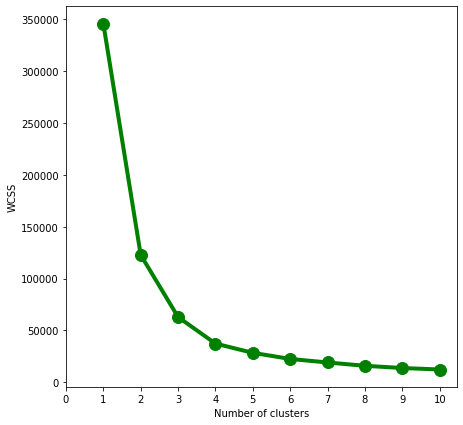

In [18]:
# KMeans clustering 

# creating a two dimentional matrix 
df_k = df[['name','cmcRank','topTenHolderRatio','topHundredHolderRatio']].dropna()
x = df_k[['topTenHolderRatio','topHundredHolderRatio']].values

# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters is **3**.

In [19]:
# Create Clustering Model
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



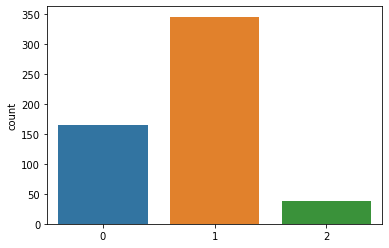

In [20]:
# Countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [21]:
# Create Scatter plot 
fig = px.scatter(df_k['topTenHolderRatio'],df_k['topHundredHolderRatio'], color=y_clusters.astype(str),
                 color_discrete_sequence=[px.colors.qualitative.Dark24[13],px.colors.qualitative.Dark24[5],px.colors.qualitative.Dark24[10]])

# Set Bar Chart properties
layout = go.Layout(
    title="Distribution of Clusters according to Top Holdings Ratios",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Top Ten Holder Ratio",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Top Hundred Holder Ratio",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Figure
fig.show()

In [22]:
# Create Scatter Plot
fig = px.scatter(df_k, x="topTenHolderRatio", y="topHundredHolderRatio", facet_col=y_clusters, color=y_clusters.astype(str),
                 color_discrete_sequence=[px.colors.qualitative.Dark24[13],px.colors.qualitative.Dark24[5],px.colors.qualitative.Dark24[10]],
                 hover_data=["name","cmcRank","topTenHolderRatio","topHundredHolderRatio"])

# Set Scatter Plot properties
layout = go.Layout(
    title="Distribution of Clusters according to Top Holdings Ratios",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Top Ten Holder Ratio",
        showgrid=False,  # Removes X-axis grid lines
        showline=True,
        linecolor="black" 
    ),
    yaxis=dict(
        title="Top Hundred Holder Ratio",  
        showgrid=False,  # Removes Y-axis grid lines
        showline=True,
        linecolor="black"    
    )
)

fig.update_layout(layout)

# Display Figure 
fig.show()

In [30]:
# Clusters mean
print(df_k[y_clusters == 0].mean())
print(df_k[y_clusters == 1].mean())
print(df_k[y_clusters == 2].mean())

cmcRank                  390.424242
topTenHolderRatio         61.913273
topHundredHolderRatio     87.586424
dtype: float64
cmcRank                  468.156522
topTenHolderRatio         91.513246
topHundredHolderRatio     97.951101
dtype: float64
cmcRank                  301.368421
topTenHolderRatio         28.040789
topHundredHolderRatio     50.095000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [35]:
print(df_k[y_clusters == 0]['name'].head(5))
print(df_k[y_clusters == 1]['name'].head(5))
print(df_k[y_clusters == 2]['name'].head(5))

8           Shiba Inu
9            TerraUSD
10            Polygon
12                Dai
13    Wrapped Bitcoin
Name: name, dtype: object
5               Terra
7         Binance USD
11    Crypto.com Coin
15             Cosmos
19          FTX Token
Name: name, dtype: object
0      Bitcoin
2       Tether
4     USD Coin
6     Dogecoin
14    Litecoin
Name: name, dtype: object


* Cluster 0: Middle Ranked Cryptocurrencies with Medium Holders Ratio
            Top 5 => Shiba Inu, TerraUSD, Polygon, Dai, Wrapped Bitcoin
* Cluster 1: Low Ranked Cryptocurrencies with High Holders Ratio
            Top 5 => Terra, Binance USD, Crypto.com Coin, Cosmos, FTX Token
* Cluster 2: High Ranked Cryptocurrencies with Low Holders Ratio 
            Top 5 => Bitcoin, Tether, USD Coin, Dogecoin, Litecoin 